# Machine Learning with the Iris Dataset

This notebook demonstrates a complete machine learning workflow using the famous Iris dataset, from data preprocessing to model evaluation, comparing traditional machine learning with neural network approaches.

## 1. Setting Up the Environment

First, we'll import all the necessary libraries for our analysis:
- **pandas & numpy**: For data manipulation and numerical operations
- **scikit-learn**: For machine learning algorithms and preprocessing tools
- **TensorFlow**: For building neural networks
- **matplotlib & seaborn**: For data visualization

In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset from scikit-learn
iris = load_iris()

# Create a DataFrame (2-Dimentional labeled data structure) with feature data and column names
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable (species) as a column
df['species'] = iris.target

# Display the first few rows of the dataset to understand its structure
print('Dataset preview')
print(df.head())
print('Dataset shape:', df.shape)

# Check if there are any missing values in the original dataset
print('Missing values in each column:', df.isnull().sum())

# Simulate a scenario with missing data by intentionally introducing a NaN value
df.loc[0, 'sepal length (cm)'] = np.nan
print('After adding missing value:', df.head())

# Handle missing values using mean imputation
df.fillna(df.mean(), inplace=True)
print('After filling missing values:', df.head())

# Separate features (X) from the target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Split data into training (80%) and testing (20%) sets with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
# This is important for many ML algorithms, especially those based on distance calculations
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Scaled X_train sample:', X_train[:5])

Dataset preview
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Dataset shape: (150, 5)
Missing values in each column: sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
After adding missing value:    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                NaN               3.5                1.4               0.2   
1                4.9               3.0                1.4     

## 2. Loading and Exploring the Iris Dataset

The Iris dataset is a classic dataset in machine learning, containing measurements for 150 iris flowers from three different species:
- Setosa (class 0)
- Versicolor (class 1)
- Virginica (class 2)

For each flower, we have four features:
- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

This dataset is often used for classification tasks, where we try to predict the species based on these measurements.

Basic statistics of the features:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.848322          3.057333           3.758000   
std             0.825809          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Samples per species:
species_name
set

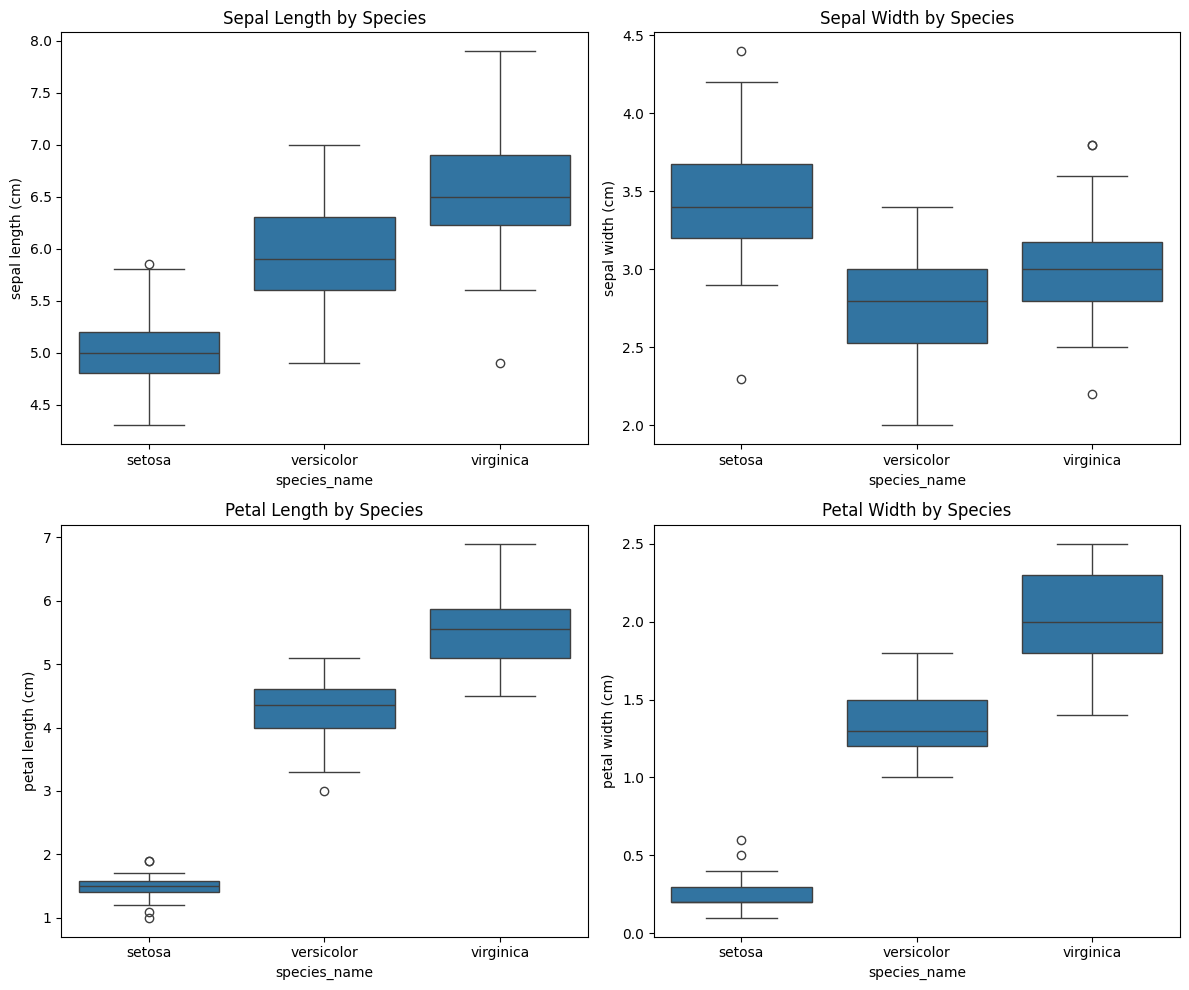

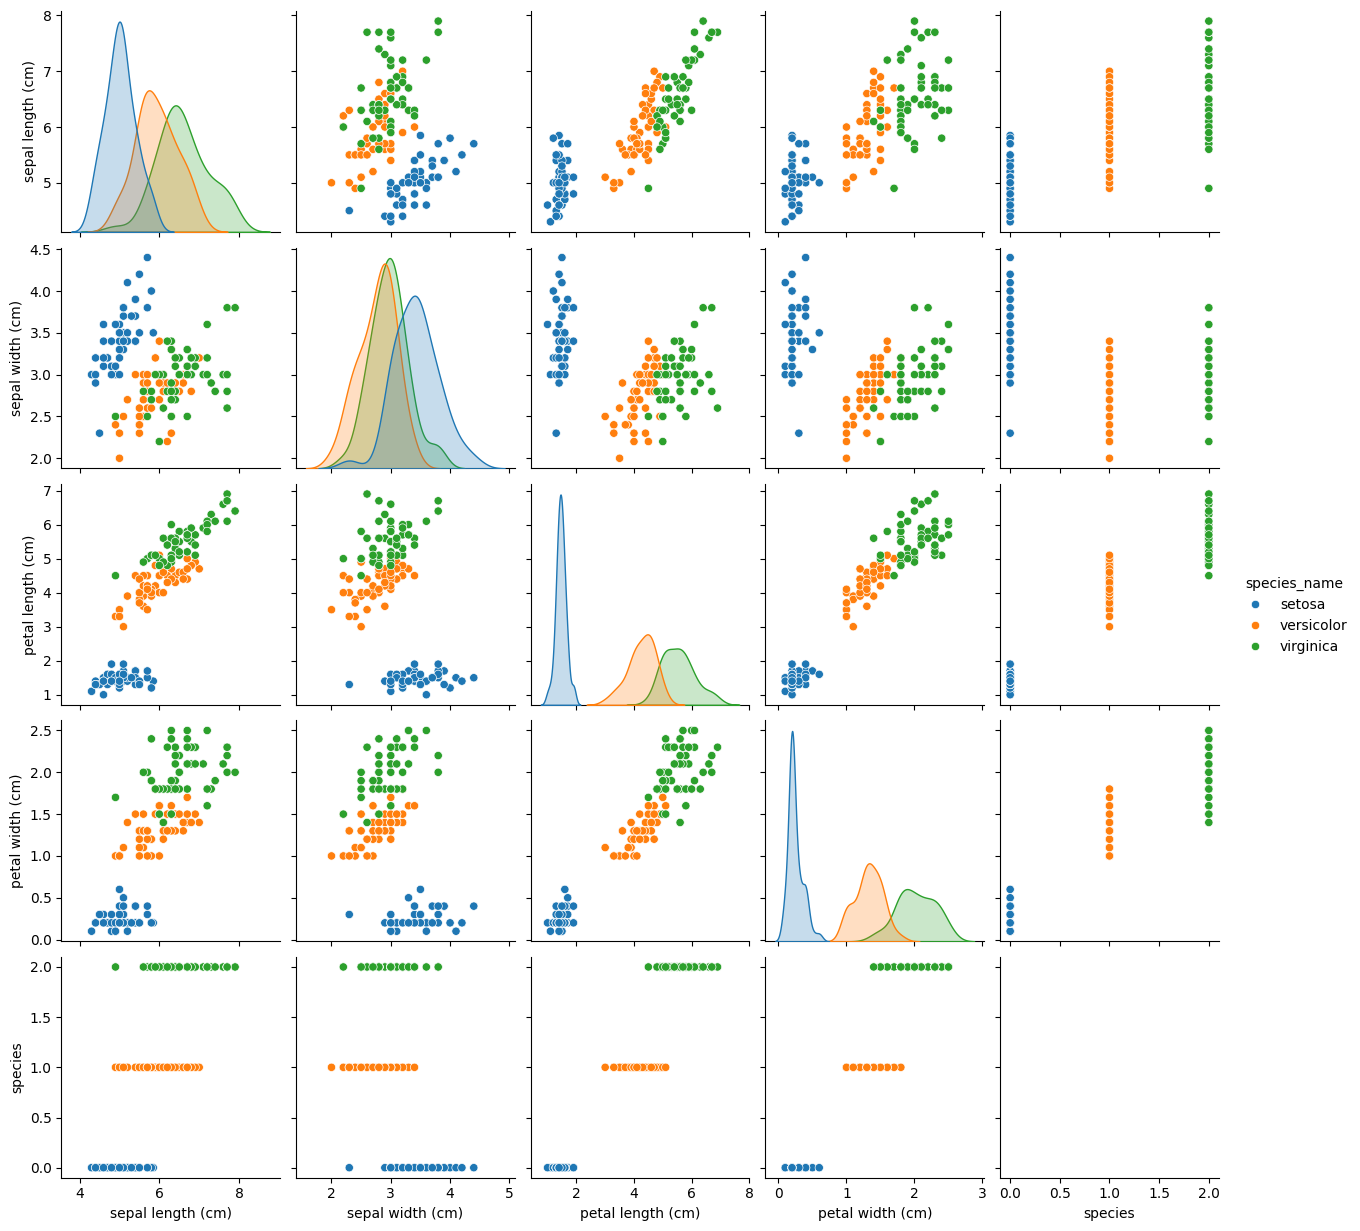

In [30]:
# Additional exploration of the dataset
print("Basic statistics of the features:")
print(df.describe())

# Map numeric target to actual species names
species_names = iris.target_names
df['species_name'] = df['species'].map({0: species_names[0], 1: species_names[1], 2: species_names[2]})

# Count of samples per species
print("\nSamples per species:")
print(df['species_name'].value_counts())

# Visualize the features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='species_name', y='sepal length (cm)', data=df)
plt.title('Sepal Length by Species')

plt.subplot(2, 2, 2)
sns.boxplot(x='species_name', y='sepal width (cm)', data=df)
plt.title('Sepal Width by Species')

plt.subplot(2, 2, 3)
sns.boxplot(x='species_name', y='petal length (cm)', data=df)
plt.title('Petal Length by Species')

plt.subplot(2, 2, 4)
sns.boxplot(x='species_name', y='petal width (cm)', data=df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()

# Create a pairplot to see relationships between features
sns.pairplot(df, hue='species_name')
plt.show()

## 3. Data Preprocessing

Data preprocessing is a crucial step in machine learning:
1. We check for missing values in the original dataset (there are none)
2. We simulate a missing value scenario by introducing a NaN value
3. We handle the missing value using mean imputation
4. We prepare our data by separating features (X) from the target variable (y)

## 4. Train-Test Split and Feature Scaling

We split our dataset into training (80%) and testing (20%) sets to properly evaluate our models.

Feature scaling is important for many machine learning algorithms, especially for those that rely on distances between data points. We use StandardScaler to normalize our features to have zero mean and unit variance.

## 5. Logistic Regression with Scikit-learn

Logistic Regression is a great baseline model for classification problems. Despite its name, it's used for classification rather than regression.

Key hyperparameters:
- `max_iter`: Maximum number of iterations for solver to converge
- Default uses L2 regularization to prevent overfitting

In [38]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression
model_sk = LogisticRegression(max_iter=200)
model_sk.fit(X_train, y_train)
y_pred_sk = model_sk.predict(X_test)
print('Scikit learn predictions:', y_pred_sk[:5])

Scikit learn predictions: [1 0 2 1 1]


Logistic Regression Coefficients:
sepal length (cm): [-0.96300608  0.50296523  0.46004085]
sepal width (cm): [ 1.14903579 -0.28457902 -0.86445677]
petal length (cm): [-1.82852899 -0.32587187  2.15440086]
petal width (cm): [-1.70713315 -0.7111667   2.41829984]

Intercept: [-0.11947657  1.97382883 -1.85435226]


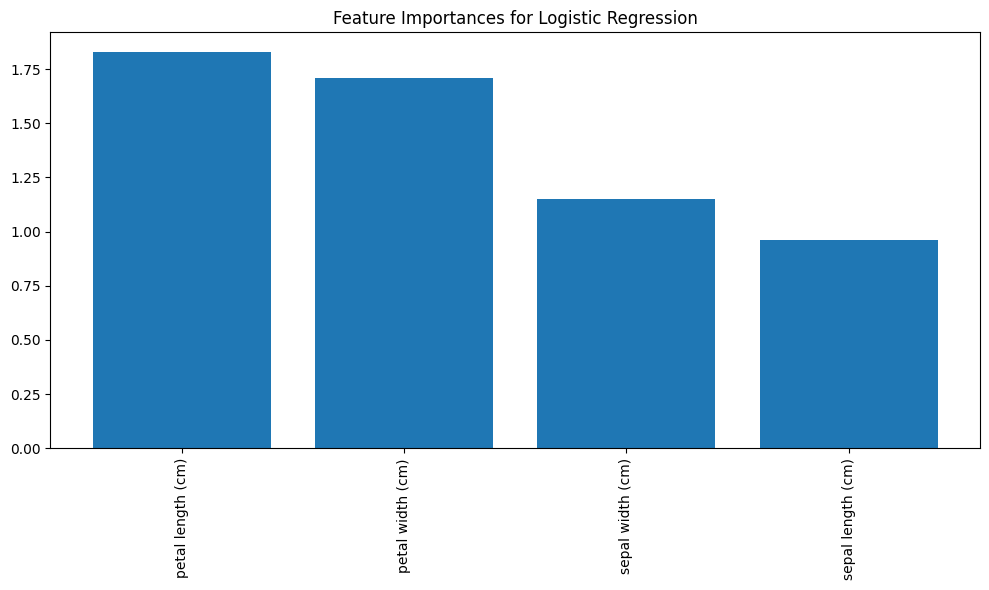

In [32]:
# Examine logistic regression coefficients
print("Logistic Regression Coefficients:")
for i, feature in enumerate(iris.feature_names):
    print(f"{feature}: {model_sk.coef_[:, i]}")

print("\nIntercept:", model_sk.intercept_)

# Feature importance
importances = np.abs(model_sk.coef_)[0]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Logistic Regression')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [iris.feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

## 6. Neural Network with TensorFlow

Neural networks can capture complex non-linear relationships in data. We'll build a simple neural network with:
- An input layer (4 inputs for our 4 features)
- One hidden layer with 10 neurons and ReLU activation
- An output layer with 3 neurons (for our 3 classes) and softmax activation

We use:
- Adam optimizer: An adaptive learning rate optimization algorithm
- Sparse categorical cross-entropy loss: Appropriate for integer-encoded class labels

In [33]:
import tensorflow as tf

# Neural Network
model_tf = tf.keras.Sequential([tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
                             tf.keras.layers.Dense(3, activation='softmax')])
model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_tf.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50


e:\Files\powerub-master\AI Club\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4675 - loss: 1.4218
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5187 - loss: 1.3346  
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5106 - loss: 1.3025 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4836 - loss: 1.2340 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4949 - loss: 1.1880 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4399 - loss: 1.2131 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5300 - loss: 1.1332 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5215 - loss: 1.0713 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4921 - loss: 1.1047 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5294 - loss: 1.0559 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5759 - loss: 0.9462 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5651 - loss: 0.9698 
Epoch 13/50

## 7. Model Evaluation and Visualization

To evaluate our models, we'll use:
- Accuracy score: The proportion of correctly classified instances
- Confusion matrix: Shows the counts of true positives, false positives, true negatives, and false negatives

Accuracy of scikit-learn model: 1.0
Confusion Matrix of scikit-learn model:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


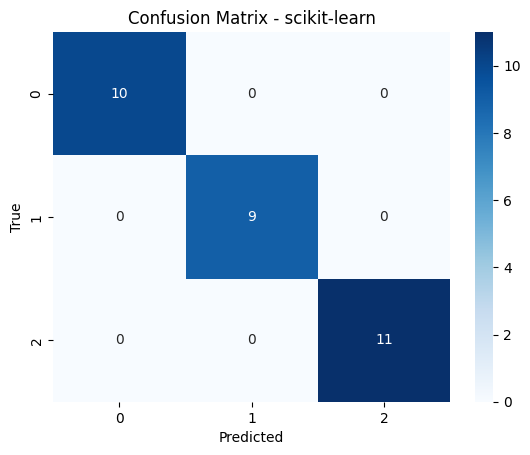

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_sk = accuracy_score(y_test, y_pred_sk)
conf_matrix_sk = confusion_matrix(y_test, y_pred_sk)
print('Accuracy of scikit-learn model:', accuracy_sk)   
print('Confusion Matrix of scikit-learn model:\n', conf_matrix_sk)
print(conf_matrix_sk)

#visualize confusion matrix
sns.heatmap(conf_matrix_sk, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - scikit-learn')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
lost_tf , accuracy_tf = model_tf.evaluate(X_test, y_test)
print('Accuracy of TensorFlow model:', accuracy_tf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.8667 - loss: 0.3547
Accuracy of TensorFlow model: 0.8666666746139526


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Confusion Matrix of TensorFlow model:
 [[10  0  0]
 [ 0  5  4]
 [ 0  0 11]]


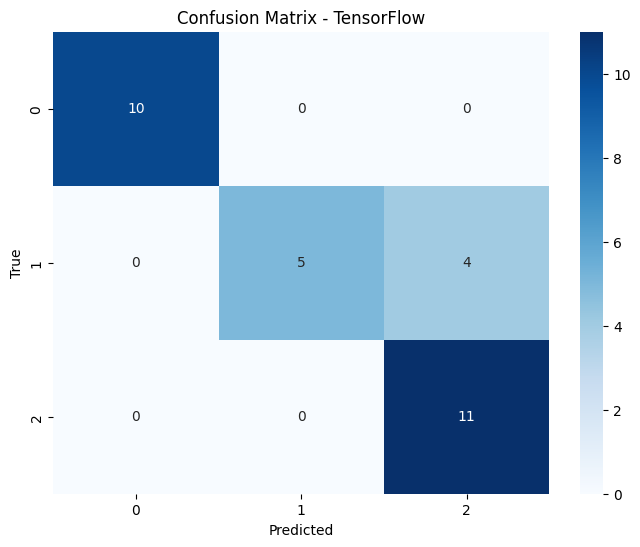


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Classification Report - Neural Network:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.56      0.71         9
   virginica       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30



In [ ]:
# Get predictions from the TensorFlow model
y_pred_tf = np.argmax(model_tf.predict(X_test), axis=1) #return index of max value in array

# Create confusion matrix for TensorFlow model
conf_matrix_tf = confusion_matrix(y_test, y_pred_tf)
print('Confusion Matrix of TensorFlow model:\n', conf_matrix_tf)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - TensorFlow')
plt.xlabel('Predicted')
plt.ylabel('True') 

# Classification report with precision, recall, and F1-score
from sklearn.metrics import classification_report
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_sk, target_names=iris.target_names))

print("\nClassification Report - Neural Network:")
print(classification_report(y_test, y_pred_tf, target_names=iris.target_names))

## 8. Comparing Model Performance

Now let's compare the performance of our two models:
- Logistic Regression: A traditional machine learning approach
- Neural Network: A deep learning approach

This comparison helps us understand which model is more appropriate for our specific classification task.

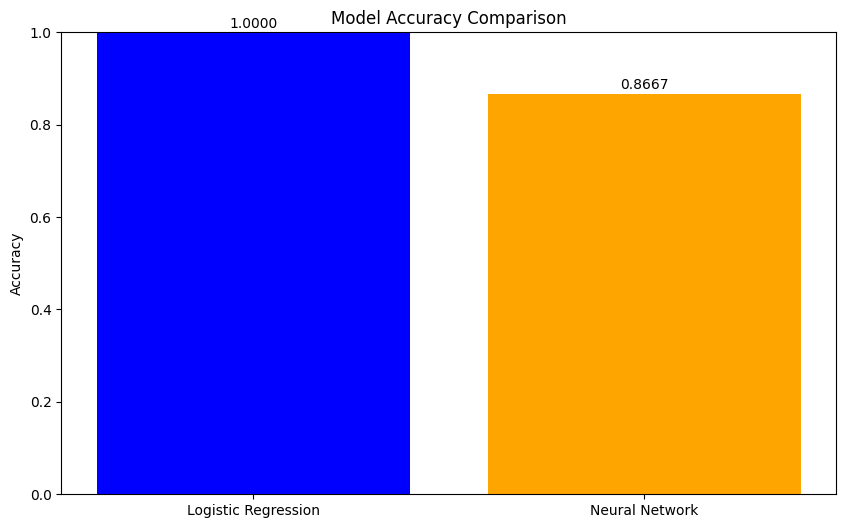

Number of samples where models disagree: 4

Samples where models disagree:
Sample 0: True class = versicolor, LogReg prediction = versicolor, NN prediction = virginica
Sample 3: True class = versicolor, LogReg prediction = versicolor, NN prediction = virginica
Sample 4: True class = versicolor, LogReg prediction = versicolor, NN prediction = virginica
Sample 15: True class = versicolor, LogReg prediction = versicolor, NN prediction = virginica

Model Performance Summary:
Logistic Regression accuracy: 1.0000
Neural Network accuracy: 0.8667
Performance difference: 0.1333
For this dataset, Logistic Regression performs better than the Neural Network.

Conclusion:
The Iris dataset is relatively simple and linearly separable for most classes,
which explains why both models perform well. For this type of problem,
the simpler Logistic Regression model might be preferred due to its interpretability
and lower computational requirements, unless the Neural Network shows significantly
better result

In [ ]:
# Compare the models visually
models = ['Logistic Regression', 'Neural Network']
accuracies = [accuracy_sk, accuracy_tf]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

# Compare predictions between models
mismatches = np.where(y_pred_sk != y_pred_tf)[0]
print(f"Number of samples where models disagree: {len(mismatches)}")

if len(mismatches) > 0:
    print("\nSamples where models disagree:")
    for idx in mismatches:
        print(f"Sample {idx}: True class = {iris.target_names[y_test.iloc[idx]]}, "
              f"LogReg prediction = {iris.target_names[y_pred_sk[idx]]}, "
              f"NN prediction = {iris.target_names[y_pred_tf[idx]]}")  

# Summary of findings
print("\nModel Performance Summary:")
print(f"Logistic Regression accuracy: {accuracy_sk:.4f}")
print(f"Neural Network accuracy: {accuracy_tf:.4f}")
print(f"Performance difference: {abs(accuracy_sk - accuracy_tf):.4f}")

if accuracy_sk > accuracy_tf:
    print("For this dataset, Logistic Regression performs better than the Neural Network.")
elif accuracy_tf > accuracy_sk:
    print("For this dataset, Neural Network performs better than Logistic Regression.")
else:
    print("Both models perform equally well on this dataset.")
    
print("\nConclusion:")
print("The Iris dataset is relatively simple and linearly separable for most classes,")
print("which explains why both models perform well. For this type of problem,")
print("the simpler Logistic Regression model might be preferred due to its interpretability")
print("and lower computational requirements, unless the Neural Network shows significantly")
print("better results on specific classes.")